<a href="https://colab.research.google.com/github/cassrobson/colab_stock_sorting/blob/main/gaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install alpaca_trade_api
!pip install mplfinance

In [ ]:
import datetime, pandas
import mplfinance as mpf
from alpaca_trade_api.stream import Stream
from alpaca_trade_api.rest import REST, TimeFrame, TimeFrameUnit
from getpass import getpass

In [ ]:
API_KEY = input("Enter your API KEY: ")
SECRET_KEY = input("Enter your SECRET KEY: ")

Enter your API KEY: PK0QHX25I5Q65QB8M3ZK
Enter your SECRET KEY: zsEBDgASPYCquOEsCZmc33CSB3RXuT0WFDbQkxQf


In [ ]:
api = REST(key_id=API_KEY, secret_key = SECRET_KEY, base_url="https://paper-api.alpaca.markets")
#SYMBOLS = [asset.symbol for asset in api.list_assets()] gets a large list of all symbols provided by alpaca
SYMBOLS = ['AAPL', 'AMZN', 'GOOGL', 'TSLA', 'NVDA', 'WMT', 'AMD', 'UBER', 'NFLX', 'MSFT']


#You can calculate today and yesterday dynamically, or you can hardcode a date to explore date in the past
# today = datetime.date.today()
# yesterday = today - datetime.timedelta(days=1)
# note the day selected can't be a weekend or a holiday

today = datetime.date(2022, 10, 31)
yesterday = datetime.date(2022, 10, 25)

bars = api.get_bars(SYMBOLS, TimeFrame.Day, yesterday.isoformat(), today.isoformat()).df
bars

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-10-25 04:00:00+00:00,150.090,152.4900,149.3600,152.340,74782289,581422,151.435017,AAPL
2022-10-26 04:00:00+00:00,150.960,151.9900,148.0400,149.350,88834489,693414,150.040815,AAPL
2022-10-27 04:00:00+00:00,148.070,149.0460,144.1300,144.800,109198287,944054,145.311760,AAPL
2022-10-28 04:00:00+00:00,148.200,157.5000,147.8200,155.740,164513407,1226015,154.587167,AAPL
2022-10-31 04:00:00+00:00,153.155,154.2400,151.9200,153.340,97925458,726580,153.279315,AAPL
2022-10-25 04:00:00+00:00,58.765,61.9750,58.6900,61.470,85501881,420261,61.133344,AMD
2022-10-26 04:00:00+00:00,59.690,61.7700,59.1500,59.730,79846810,427232,60.379019,AMD
2022-10-27 04:00:00+00:00,61.600,62.7200,58.5100,58.600,83871440,470204,60.367308,AMD
2022-10-28 04:00:00+00:00,59.100,62.3500,58.9200,62.010,78111760,430459,61.297352,AMD


In [ ]:
#creating new column to compare previous close to recent open
bars['previous_close'] = bars['close'].shift(1)
bars

,open,high,low,close,volume,trade_count,vwap,symbol,previous_close
timestamp,,,,,,,,,
2022-10-25 04:00:00+00:00,150.090,152.4900,149.3600,152.340,74782289,581422,151.435017,AAPL,NaN
2022-10-26 04:00:00+00:00,150.960,151.9900,148.0400,149.350,88834489,693414,150.040815,AAPL,152.340
2022-10-27 04:00:00+00:00,148.070,149.0460,144.1300,144.800,109198287,944054,145.311760,AAPL,149.350
2022-10-28 04:00:00+00:00,148.200,157.5000,147.8200,155.740,164513407,1226015,154.587167,AAPL,144.800
2022-10-31 04:00:00+00:00,153.155,154.2400,151.9200,153.340,97925458,726580,153.279315,AAPL,155.740
2022-10-25 04:00:00+00:00,58.765,61.9750,58.6900,61.470,85501881,420261,61.133344,AMD,153.340
2022-10-26 04:00:00+00:00,59.690,61.7700,59.1500,59.730,79846810,427232,60.379019,AMD,61.470
2022-10-27 04:00:00+00:00,61.600,62.7200,58.5100,58.600,83871440,470204,60.367308,AMD,59.730
2022-10-28 04:00:00+00:00,59.100,62.3500,58.9200,62.010,78111760,430459,61.297352,AMD,58.600


In [ ]:
#filter the rows to only include the ones matching 'today' date
filtered = bars[bars.index.strftime('%Y-%m-%d') == today.isoformat()].copy()
filtered

,open,high,low,close,volume,trade_count,vwap,symbol,previous_close
timestamp,,,,,,,,,
2022-10-31 04:00:00+00:00,153.155,154.2400,151.920,153.34,97925458,726580,153.279315,AAPL,155.74
2022-10-31 04:00:00+00:00,60.750,61.8600,59.525,60.06,73263969,390443,60.317914,AMD,62.01
2022-10-31 04:00:00+00:00,103.560,104.8700,100.740,102.44,100243868,755727,102.246095,AMZN,103.41
2022-10-31 04:00:00+00:00,95.420,96.0300,93.980,94.51,31667423,295252,94.634145,GOOGL,96.29
2022-10-31 04:00:00+00:00,233.760,234.9200,231.150,232.13,28349085,310616,232.713069,MSFT,235.87
2022-10-31 04:00:00+00:00,295.130,297.6199,289.500,291.88,7503494,116687,292.137289,NFLX,295.72
2022-10-31 04:00:00+00:00,137.775,138.3800,132.970,134.97,48627223,402536,135.183096,NVDA,138.34
2022-10-31 04:00:00+00:00,226.195,229.8500,221.940,227.54,61560070,717792,226.621743,TSLA,228.52
2022-10-31 04:00:00+00:00,27.610,27.7300,26.300,26.57,37278015,236941,26.754443,UBER,27.50


In [ ]:
#create new column comparing previous close to most recent close as a percentage
filtered['percent'] = filtered['open'] / filtered['previous_close']
filtered

,open,high,low,close,volume,trade_count,vwap,symbol,previous_close,percent
timestamp,,,,,,,,,,
2022-10-31 04:00:00+00:00,153.155,154.2400,151.920,153.34,97925458,726580,153.279315,AAPL,155.74,0.983402
2022-10-31 04:00:00+00:00,60.750,61.8600,59.525,60.06,73263969,390443,60.317914,AMD,62.01,0.979681
2022-10-31 04:00:00+00:00,103.560,104.8700,100.740,102.44,100243868,755727,102.246095,AMZN,103.41,1.001451
2022-10-31 04:00:00+00:00,95.420,96.0300,93.980,94.51,31667423,295252,94.634145,GOOGL,96.29,0.990965
2022-10-31 04:00:00+00:00,233.760,234.9200,231.150,232.13,28349085,310616,232.713069,MSFT,235.87,0.991054
2022-10-31 04:00:00+00:00,295.130,297.6199,289.500,291.88,7503494,116687,292.137289,NFLX,295.72,0.998005
2022-10-31 04:00:00+00:00,137.775,138.3800,132.970,134.97,48627223,402536,135.183096,NVDA,138.34,0.995916
2022-10-31 04:00:00+00:00,226.195,229.8500,221.940,227.54,61560070,717792,226.621743,TSLA,228.52,0.989826
2022-10-31 04:00:00+00:00,27.610,27.7300,26.300,26.57,37278015,236941,26.754443,UBER,27.50,1.004000


In [ ]:
gap_ups = filtered[filtered['percent'] > 1.002]
gap_ups

,open,high,low,close,volume,trade_count,vwap,symbol,previous_close,percent
timestamp,,,,,,,,,,
2022-10-31 04:00:00+00:00,27.61,27.73,26.3,26.57,37278015,236941,26.754443,UBER,27.5,1.004


In [ ]:
gap_downs = filtered[filtered['percent'] < 0.99]
gap_downs

,open,high,low,close,volume,trade_count,vwap,symbol,previous_close,percent
timestamp,,,,,,,,,,
2022-10-31 04:00:00+00:00,153.155,154.24,151.920,153.34,97925458,726580,153.279315,AAPL,155.74,0.983402
2022-10-31 04:00:00+00:00,60.750,61.86,59.525,60.06,73263969,390443,60.317914,AMD,62.01,0.979681
2022-10-31 04:00:00+00:00,226.195,229.85,221.940,227.54,61560070,717792,226.621743,TSLA,228.52,0.989826


In [ ]:
#isolate symbols that gapped down into list
gap_down_symbols = gap_downs['symbol'].tolist()
gap_down_symbols

['AAPL', 'AMD', 'TSLA']

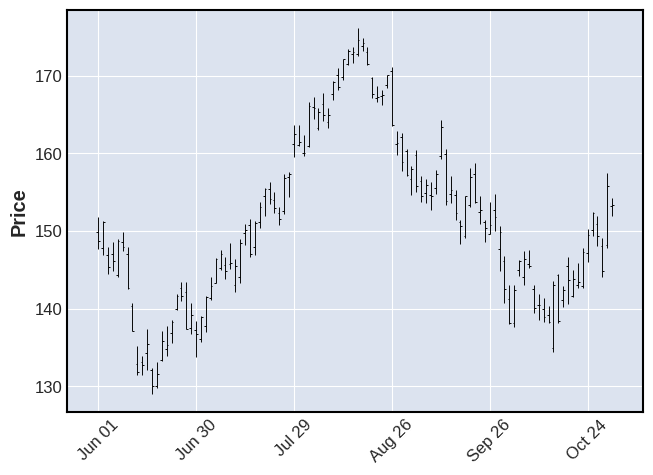

In [ ]:
#Using mplfinance to visual data over a time period, github -> /mathplotlib/mplfinance
bars = api.get_bars('AAPL', TimeFrame.Day, '2022-06-01', '2022-10-31').df
mpf.plot(bars)

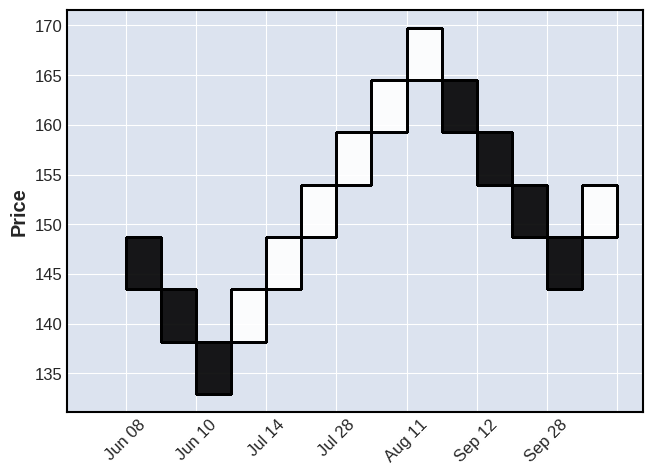

In [ ]:
mpf.plot(bars, type='renko')

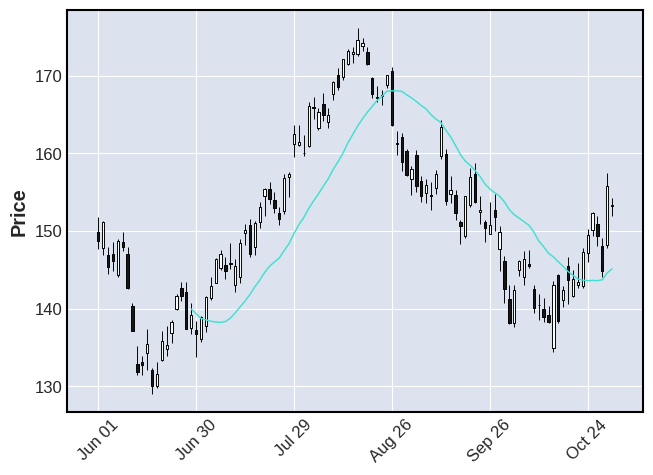

In [ ]:
mpf.plot(bars, type='candlestick', mav=20) #mav is moving average

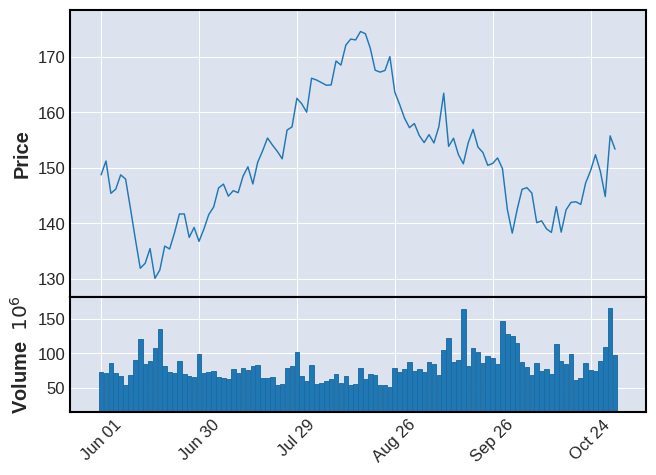

In [ ]:
mpf.plot(bars, type='line', volume = True)

In [ ]:
#set new timeframe to see what happens after the gap
pandas.set_option('display.max_rows', None)
bars = api.get_bars(gap_down_symbols, TimeFrame(15, TimeFrameUnit.Minute), start=today.isoformat(), end=today.isoformat()).df
bars

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-10-31 05:00:00+00:00,154.8600,154.8600,154.8600,154.8600,272,6,154.928934,AAPL
2022-10-31 06:15:00+00:00,155.0000,155.0000,155.0000,155.0000,102,2,155.000000,AAPL
2022-10-31 08:00:00+00:00,155.0000,155.6600,154.5400,154.7500,73011,1175,154.753973,AAPL
2022-10-31 08:15:00+00:00,154.7500,154.9000,154.7000,154.7100,20400,504,154.778167,AAPL
2022-10-31 08:30:00+00:00,154.6800,154.6800,154.4500,154.6200,18231,526,154.566289,AAPL
2022-10-31 08:45:00+00:00,154.6100,154.7500,154.5600,154.6800,17625,352,154.604300,AAPL
2022-10-31 09:00:00+00:00,154.7100,154.8000,154.6700,154.7100,9819,208,154.728011,AAPL
2022-10-31 09:15:00+00:00,154.8000,154.9900,154.7600,154.8800,13877,282,154.881747,AAPL
2022-10-31 09:30:00+00:00,154.8800,155.0000,154.8800,154.9500,10104,218,154.925307,AAPL


In [ ]:
#How did stocks that gapped down perform the first 15 min, 30 min, 1 hr of trading?
filtered = bars[bars.index.strftime('%H:%M').isin(['13:30', '13:45'])].copy()
filtered

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-10-31 13:30:00+00:00,153.1900,154.070,152.60,153.420,9587357,118569,153.244169,AAPL
2022-10-31 13:45:00+00:00,153.4200,153.900,152.33,153.010,8919106,45173,153.113914,AAPL
2022-10-31 13:30:00+00:00,60.7500,61.860,60.40,60.460,6815526,38952,60.987288,AMD
2022-10-31 13:45:00+00:00,60.4599,60.785,59.96,60.495,4555538,26227,60.355091,AMD
2022-10-31 13:30:00+00:00,226.1950,228.980,224.80,227.380,5670689,104169,226.868726,TSLA
2022-10-31 13:45:00+00:00,227.3500,227.360,223.44,224.040,3921618,46673,225.154154,TSLA


In [ ]:
filtered = bars[bars.index.strftime('%H:%M').isin(['13:30', '14:00'])].copy()
filtered

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-10-31 13:30:00+00:00,153.1900,154.07,152.60,153.4200,9587357,118569,153.244169,AAPL
2022-10-31 14:00:00+00:00,153.0000,153.40,152.36,152.6600,4320765,35423,152.840841,AAPL
2022-10-31 13:30:00+00:00,60.7500,61.86,60.40,60.4600,6815526,38952,60.987288,AMD
2022-10-31 14:00:00+00:00,60.4900,61.09,60.39,60.4683,4280586,23509,60.711910,AMD
2022-10-31 13:30:00+00:00,226.1950,228.98,224.80,227.3800,5670689,104169,226.868726,TSLA
2022-10-31 14:00:00+00:00,224.0449,224.99,222.78,223.1600,3385925,40586,223.785236,TSLA


In [ ]:
filtered = bars[bars.index.strftime('%H:%M').isin(['13:30', '14:30'])].copy()
filtered

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-10-31 13:30:00+00:00,153.190,154.07,152.6000,153.4200,9587357,118569,153.244169,AAPL
2022-10-31 14:30:00+00:00,152.460,152.95,152.2411,152.8900,3162601,28279,152.604408,AAPL
2022-10-31 13:30:00+00:00,60.750,61.86,60.4000,60.4600,6815526,38952,60.987288,AMD
2022-10-31 14:30:00+00:00,60.270,60.35,59.8503,60.1604,3441993,19374,60.081703,AMD
2022-10-31 13:30:00+00:00,226.195,228.98,224.8000,227.3800,5670689,104169,226.868726,TSLA
2022-10-31 14:30:00+00:00,223.660,223.95,221.9400,223.4295,2677533,34554,222.721839,TSLA
